#数据透视表

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##3.10.3 数据透视表

In [4]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


###01 多级数据透视表

In [5]:
age = pd.cut(titanic['age'],[0,18,50,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 50]  0.967213  0.912281  0.413793
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 50]  0.442857  0.069444  0.139896
       (50, 80]  0.192308  0.083333  0.000000

In [6]:
fare = pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 50]              NaN  0.916667  ...          0.909091  0.391304
       (50, 80]              NaN  0.000000  ...          1.000000       NaN
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 50]              0.0  0.095238  ...          0.033333  0.192308
       (50, 80]              NaN  0.111111  ...          0.000000       NaN

[6 rows x 6 columns]

###3.10.4 案例：美国人的生日


In [7]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   674k      0 --:--:-- --:--:-- --:--:--  673k


In [8]:
%ls -lh

total 264K
-rw-r--r-- 1 root root 259K Feb 12 15:01 births.csv
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data/


In [0]:
births = pd.read_csv('./births.csv' )

In [10]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


用透视表查看数据，先增加一列数据表示不同年代，看各年代男女出生比例：

In [11]:
births['decade'] = 10 * (births['year']//10)
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [0]:
import matplotlib.pyplot as plt
sns.set()

Text(0, 0.5, 'Total births per year')

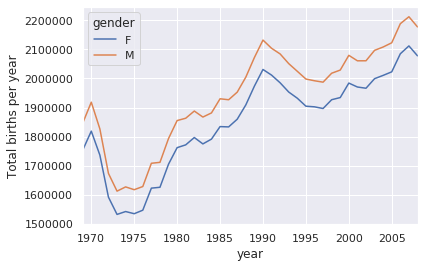

In [13]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('Total births per year')

In [14]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15067 non-null float64
gender    15547 non-null object
births    15547 non-null int64
decade    15547 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 728.9+ KB


In [15]:
births[births['day'].isnull()]

,year,month,day,gender,births,decade
15067,1989,1,NaN,F,156749,1980
15068,1989,1,NaN,M,164052,1980
15069,1989,2,NaN,F,146710,1980
15070,1989,2,NaN,M,154047,1980
15071,1989,3,NaN,F,165889,1980
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [16]:
births.fillna({'day':1},inplace=True)
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15547 non-null float64
gender    15547 non-null object
births    15547 non-null int64
decade    15547 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 728.9+ KB


In [0]:
births['day'] = births['day'].astype(int)


In [18]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [19]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15547 non-null int64
gender    15547 non-null object
births    15547 non-null int64
decade    15547 non-null int64
dtypes: int64(5), object(1)
memory usage: 728.9+ KB


In [20]:
a =10000 * births.year + 100 * births.month +  births.day
a

0        19690101
1        19690101
2        19690102
3        19690102
4        19690103
           ...   
15542    20081001
15543    20081101
15544    20081101
15545    20081201
15546    20081201
Length: 15547, dtype: int64

In [21]:
pd.to_datetime(a, format='%Y%m%d', errors='ignore')

0        19690101
1        19690101
2        19690102
3        19690102
4        19690103
           ...   
15542    20081001
15543    20081101
15544    20081101
15545    20081201
15546    20081201
Length: 15547, dtype: int64

从年月日创建一个日期索引

In [0]:
 births['to_datetime'] = pd.to_datetime(10000 * births.year + 100 * births.month +
                              births.day,format='%Y%m%d',errors='ignore')



In [23]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 7 columns):
year           15547 non-null int64
month          15547 non-null int64
day            15547 non-null int64
gender         15547 non-null object
births         15547 non-null int64
decade         15547 non-null int64
to_datetime    15547 non-null int64
dtypes: int64(6), object(1)
memory usage: 850.4+ KB


In [0]:
df = pd.DataFrame({'my_dates':['20150101','20150102','20150103'],'myvals':[1,2,3]})
df['to_dates'] = pd.to_datetime(df['my_dates'],format='%Y%m%d')
df['day_of_week'] = df['to_dates'].dt.dayofweek


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
my_dates       3 non-null object
myvals         3 non-null int64
to_dates       3 non-null datetime64[ns]
day_of_week    3 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 224.0+ bytes


In [27]:
df

,my_dates,myvals,to_dates,day_of_week
0,20150101,1,2015-01-01,3
1,20150102,2,2015-01-02,4
2,20150103,3,2015-01-03,5


In [28]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 7 columns):
year           15547 non-null int64
month          15547 non-null int64
day            15547 non-null int64
gender         15547 non-null object
births         15547 non-null int64
decade         15547 non-null int64
to_datetime    15547 non-null int64
dtypes: int64(6), object(1)
memory usage: 850.4+ KB


In [29]:
births.to_datetime

0        19690101
1        19690101
2        19690102
3        19690102
4        19690103
           ...   
15542    20081001
15543    20081101
15544    20081101
15545    20081201
15546    20081201
Name: to_datetime, Length: 15547, dtype: int64

In [30]:
pd.to_datetime(births['to_datetime'])

0       1970-01-01 00:00:00.019690101
1       1970-01-01 00:00:00.019690101
2       1970-01-01 00:00:00.019690102
3       1970-01-01 00:00:00.019690102
4       1970-01-01 00:00:00.019690103
                     ...             
15542   1970-01-01 00:00:00.020081001
15543   1970-01-01 00:00:00.020081101
15544   1970-01-01 00:00:00.020081101
15545   1970-01-01 00:00:00.020081201
15546   1970-01-01 00:00:00.020081201
Name: to_datetime, Length: 15547, dtype: datetime64[ns]

###下面进行一个复利计算
年化利率10%：

同岁的俩小伙伴，A男生的理财意识比较早，20岁就开始存钱，每年定存2000元，存到26岁不再存钱，就靠着利息了；

B女生到了26岁才开始理财，每年也存2000元，一直存到了55岁，到期后，自己的账上一共有
328988元,而男生却有300991元，女生比男生多了27997元，但女生实际比男生多存48000元。



男生帐户的钱在20年后被女生超越，20年后男生128004元，而女生127649元，
男生只存了6年钱，之后全靠利息，女生却存了20年钱，多出14年才追上。



In [0]:
M = 2000
x = 0.1
n = 6

def c(M,x,n):
  r = M*((1+x)**(n+1)-1)/x
  return r 

In [33]:
a = c(2000,0.1,6)
a 

18974.342000000022

In [40]:
a * (1+0.1)**30

331090.9263454278

In [41]:
b = c(2000,0.1,30)
b

363886.84991550195

In [0]:
N = list(range(50))
A = np.array([int(a * (1+x)**n) for n in N])
B = np.array([int(M*((1+x)**(n+1)-1)/x) for n in N])

In [0]:
A = A.astype(int)
B = B.astype(int)

In [0]:
C = pd.DataFrame({'b':B,'a':A})

In [69]:
C.head()

,b,a
0,2000,18974
1,4200,20871
2,6620,22958
3,9282,25254
4,12210,27780


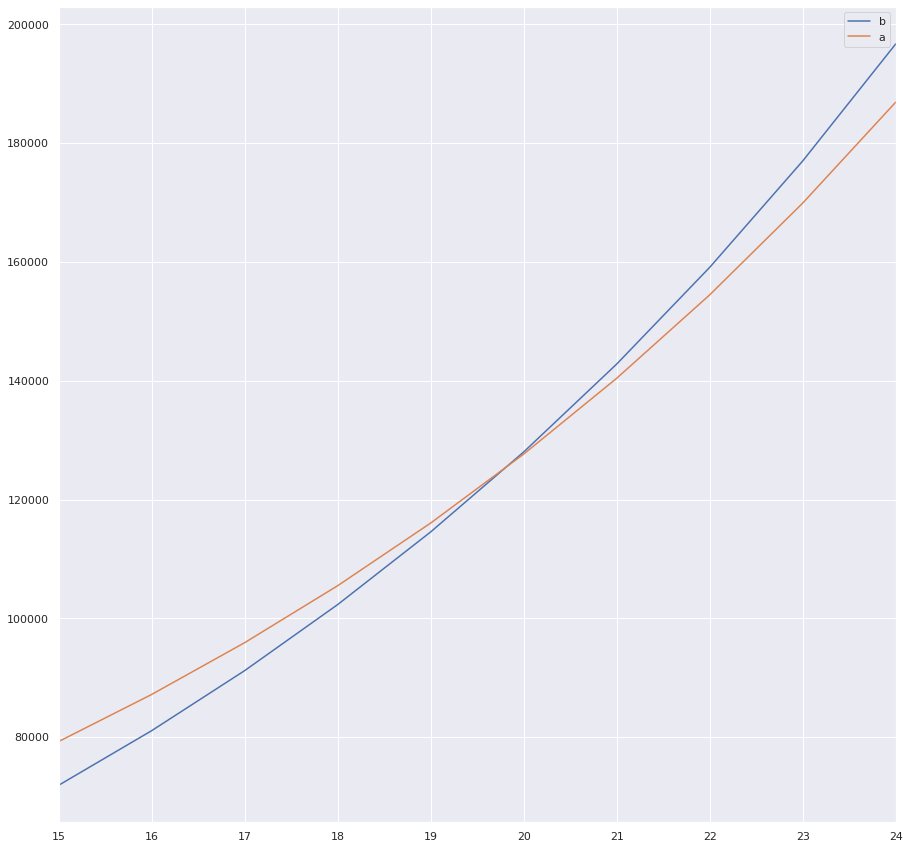

In [78]:
C[15:25].plot( figsize=(15,15))

In [77]:
C[15:25]

,b,a
15,71899,79260
16,81089,87186
17,91198,95905
18,102318,105495
19,114549,116045
20,128004,127649
21,142805,140414
22,159086,154456
23,176994,169901
24,196694,186892


In [81]:
C[25:30]

,b,a
25,218363,205581
26,242199,226139
27,268419,248753
28,297261,273628
29,328988,300991
